In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from gensim.utils import simple_preprocess
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

In [6]:
df = pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
df.duplicated().sum()

415

In [10]:
df.drop_duplicates(keep='first', inplace=True)

In [11]:
df.shape

(5157, 2)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [14]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# EDA (exploratory data analysis)

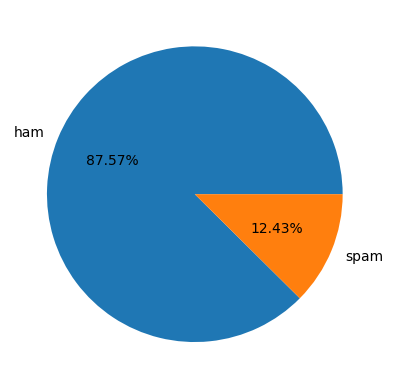

In [15]:
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct='%.2f%%');

In [16]:
import nltk

In [17]:
df['num_character'] = df['Message'].apply(len)

In [18]:
df.head()

,Category,Message,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
df['num_words'] = df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
df['num_sentence'] = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,Category,Message,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


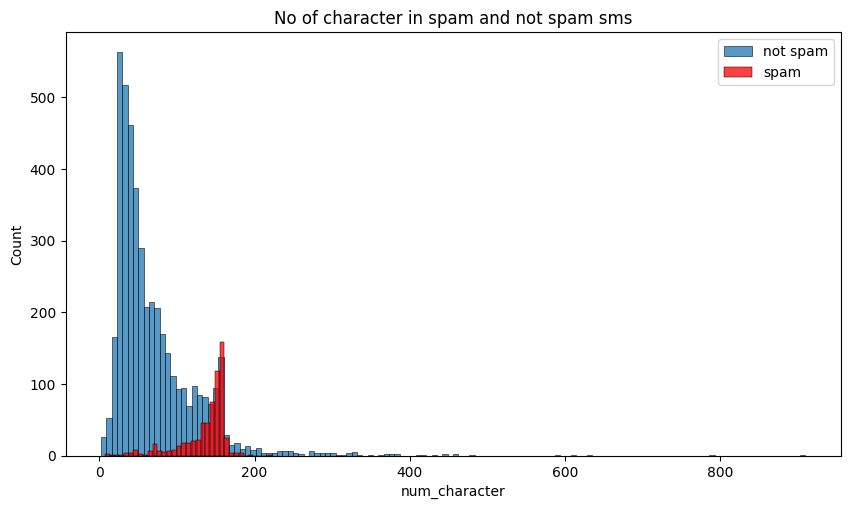

In [22]:
plt.figure(figsize=[10, 5.5])
plt.title('No of character in spam and not spam sms')
sns.histplot(df[df['Category'] == 0].iloc[:, 2], label='not spam')
sns.histplot(df[df['Category'] == 1].iloc[:, 2], label='spam', color='red')
plt.legend();

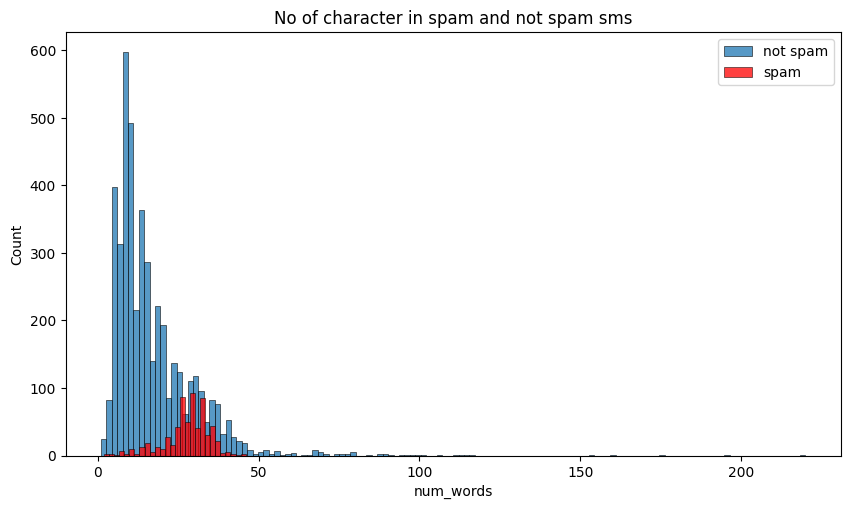

In [23]:
plt.figure(figsize=[10, 5.5])
plt.title('No of character in spam and not spam sms')
sns.histplot(df[df['Category'] == 0].iloc[:, 3], label='not spam')
sns.histplot(df[df['Category'] == 1].iloc[:, 3], label='spam', color='red')
plt.legend();

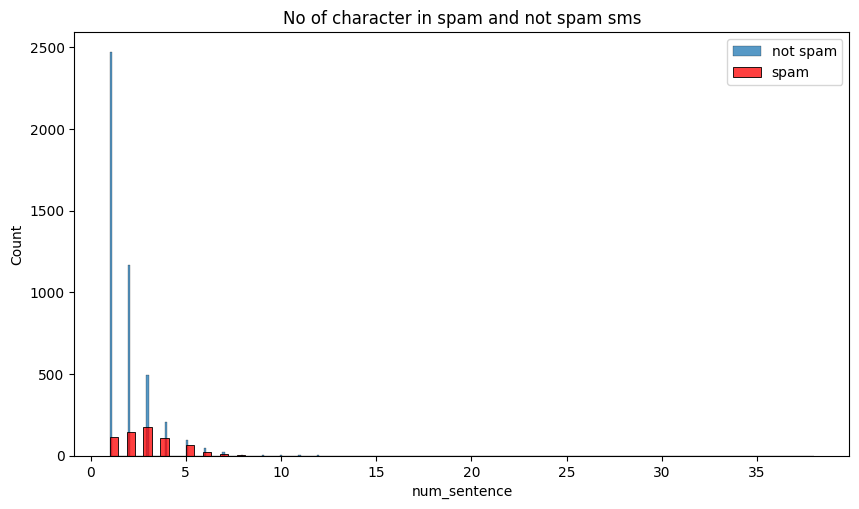

In [24]:
plt.figure(figsize=[10, 5.5])
plt.title('No of character in spam and not spam sms')
sns.histplot(df[df['Category'] == 0].iloc[:, 4], label='not spam')
sns.histplot(df[df['Category'] == 1].iloc[:, 4], label='spam', color='red')
plt.legend();

In [25]:
df.select_dtypes(include=np.number).corr()

,Category,num_character,num_words,num_sentence
Category,1.000000,0.374409,0.255968,0.259023
num_character,0.374409,1.000000,0.966155,0.622428
num_words,0.255968,0.966155,1.000000,0.679396
num_sentence,0.259023,0.622428,0.679396,1.000000


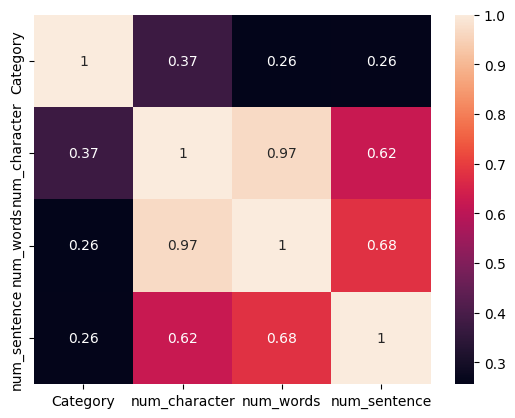

In [26]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True);

# Data preprocessing

1. lower case
2. tokenization
3. removing special characters
4. removing stop words and punctuations
5. stemming

In [28]:
ps = PorterStemmer()

In [29]:
def transform_text(text):
    text = text.lower()
    # print(text)
    text = nltk.word_tokenize(text)
    # print(text)

    # removing special character
    l = []
    for i in text:
        if i.isalnum():
            l.append(i)
    # print(l)

    # removing stop words and punctuation
    text = l.copy()
    l.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            l.append(i)
    # print(l)

    # appling steming
    text = l.copy()
    l.clear()
    for i in text:
        l.append(ps.stem(i))
    # print(l)

    return ' '.join(l)
        

In [31]:
df['transform_text'] = df['Message'].apply(transform_text)

In [ ]:
# transform_text(df['Message'][4251])

In [ ]:
wc = WordCloud(background_color='black', height=500, min_font_size=10, width=500)

In [ ]:
df[df['Category'] == 1]['transform_text'].str.cat(sep=' ')

In [ ]:
spam_wc = wc.generate(df[df['Category'] == 1]['transform_text'].str.cat(sep=' '))

In [ ]:
plt.figure(figsize=[8, 8])
plt.imshow(spam_wc);

In [ ]:
not_spam_wc = wc.generate(df[df['Category'] == 0]['transform_text'].str.cat(sep=' '))

In [ ]:
plt.figure(figsize=[8, 8])
plt.imshow(not_spam_wc);

In [ ]:
spam_corpus = []
for msg in df[df['Category'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

print(spam_corpus)

In [ ]:
spam_df = pd.DataFrame(Counter(spam_corpus).most_common()).rename(columns={0 : 'words', 1 : 'count'})
spam_df

In [ ]:
plt.figure(figsize=[10, 6])
sns.barplot(x='words', y='count', data=spam_df.head(30))
plt.xticks(rotation='vertical');

In [ ]:
not_spam_corpus = []
for msg in df[df['Category'] == 0]['transform_text'].tolist():
    for word in msg.split():
        not_spam_corpus.append(word)

print(not_spam_corpus)

In [ ]:
not_spam_df = pd.DataFrame(Counter(not_spam_corpus).most_common()).rename(columns={0 : 'words', 1 : 'count'})
not_spam_df

In [ ]:
plt.figure(figsize=[10, 6])
sns.barplot(x='words', y='count', data=not_spam_df.head(30))
plt.xticks(rotation='vertical');

# Vectorization

In [33]:
tf = TfidfVectorizer(max_features=3000)

In [34]:
x = tf.fit_transform(df['transform_text']).toarray()
y = df['Category']

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Modeling 

In [38]:
svc = SVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lr = LogisticRegression()
rf = RandomForestClassifier(n_estimators=50, random_state=42)
ada = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=42)
gb = GradientBoostingClassifier(n_estimators=50, random_state=3)
xgb = XGBClassifier(n_estimators=50 , random_state=2)

In [39]:
clfs = {
    'SVC' : svc,
    'KNeighborsClassifier' : knc,
    'MultinomialNB' : mnb,
    'DecisionTreeClassifier' : dtc,
    'LogisticRegression' : lr,
    'RandomForestClassifier' : rf,
    'AdaBoostClassifier' : ada,
    'BaggingClassifier' : bc,
    'GradientBoostingClassifier' : gb,
    'XGBClassifier' : xgb
}

In [40]:
training_score = []
testing_score = []
prison_score = []

In [59]:
def training(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    #predict testing
    y_pred_test = clf.predict(x_test)
    #predict training
    y_pred_train = clf.predict(x_train)
    
    training_score.append(accuracy_score(y_train, y_pred_train))
    testing_score.append(accuracy_score(y_test,y_pred_test))
    prison_score.append(precision_score(y_test, y_pred_test))

    return accuracy_score(y_train, y_pred_train), accuracy_score(y_test,y_pred_test), precision_score(y_test, y_pred_test)

In [3]:
for name, clf in clfs.items():
    training, testing, precision = training(clf, x_train, y_train, x_test, y_test)

    print('for', name)
    print('training accuracy : ', training)
    print('testing accuracy : ', testing)
    print('precison accuracy : ', precision)

In [62]:
acc = pd.DataFrame({'algorithm' : clfs.keys(), 'training accuracy' : training_score, 'testing accuracy' : testing_score, 'pricision accuracy' : prison_score})

In [4]:
acc.sort_values('testing accuracy', ascending=False)

In [41]:
mn = MultinomialNB()
mn.fit(x_train, y_train)

,"alpha alpha: float or array-like of shape (n_features,), default=1.0Additive (Laplace/Lidstone) smoothing parameter(set alpha=0 and force_alpha=True, for no smoothing).",1.0
,"force_alpha force_alpha: bool, default=TrueIf False and alpha is less than 1e-10, it will set alpha to1e-10. If True, alpha will remain unchanged. This may causenumerical errors if alpha is too close to 0... versionadded:: 1.2.. versionchanged:: 1.4 The default value of `force_alpha` changed to `True`.",True
,"fit_prior fit_prior: bool, default=TrueWhether to learn class prior probabilities or not.If false, a uniform prior will be used.",True
,"class_prior class_prior: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None


In [43]:
print(mn.score(x_train, y_train))
print(mn.score(x_test, y_test))
print(precision_score(y_test, mn.predict(x_test)))

0.9769696969696969
0.9777131782945736
1.0


mnb preform good

In [64]:
import pickle
pickle.dump(tf, open('tff.pkl', 'wb'))
pickle.dump(mnb, open('mnb.pkl', 'wb'))